# Progress within last week
## System Schematics

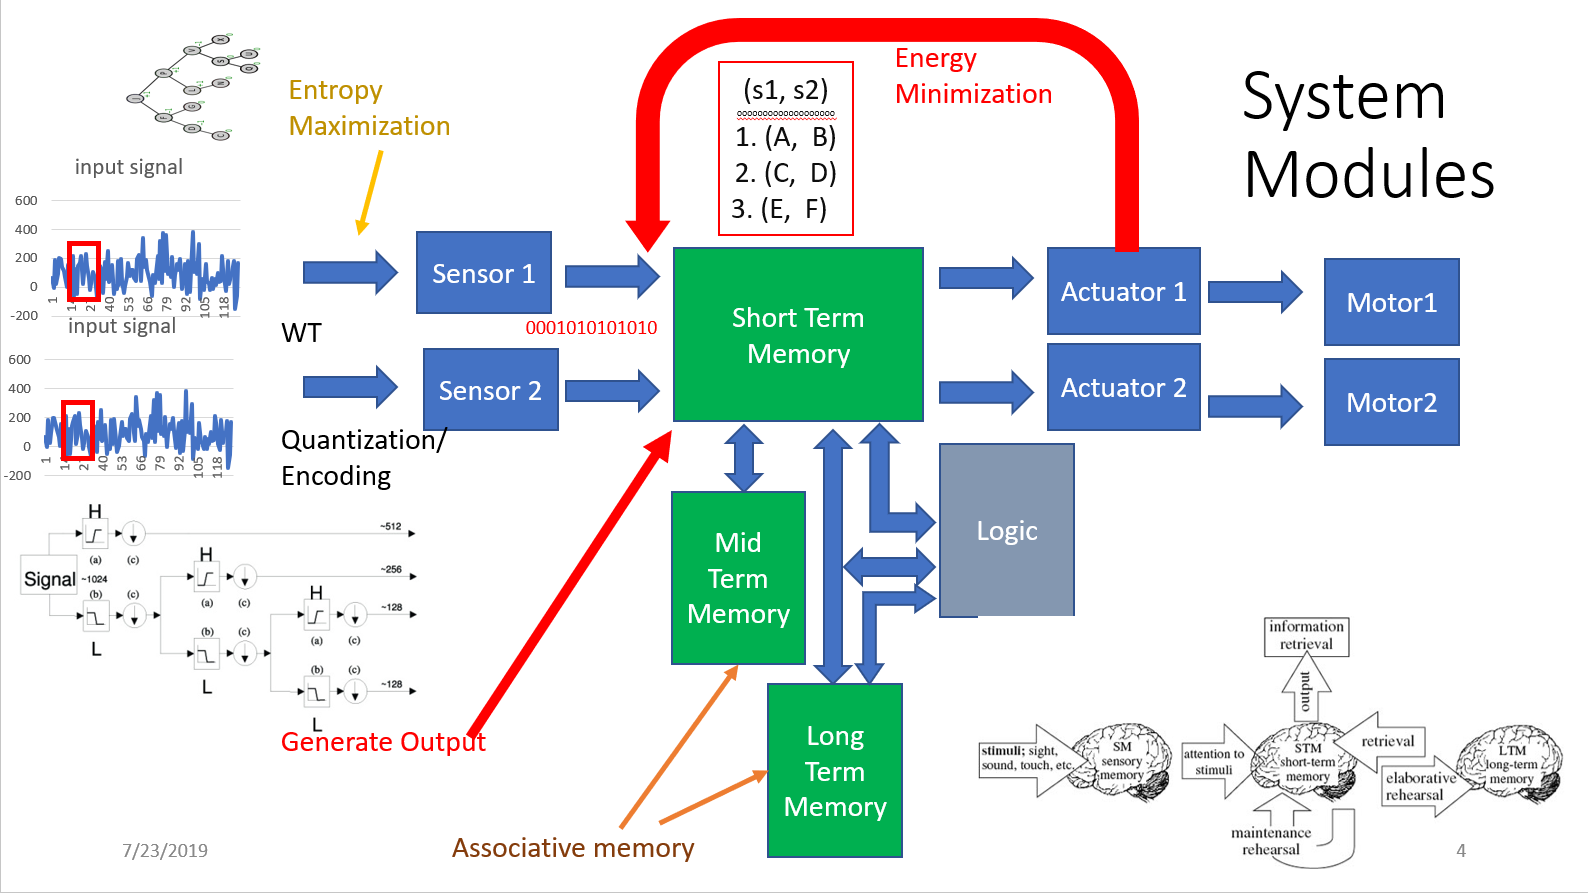

In [1]:
from IPython.display import display, Image
i = Image(filename='data\SystemSchematics.png')
i

 ### The most of the oeprations are to decode input data and then to encode it for further transmission.   


## Sample convolution Neural Network 
![some text](https://miro.medium.com/max/1000/1*Y_Rz06Kz3JebUmTSv4bJDA.png "A Image")


### Current deep neural networks apply different methods of data enlargement and then using pooling algorithms decrease it's size so that most of the information is kept.

## In my case, I am working with a limited set of signals for proof of concept, then move to 1D and 2D data    

# Encode -> Decode -> Encode -> Decode -> Encode


In [2]:
import numpy as np
from pywt import wavedec
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import  graphviz_layout
import networkx as nx
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 10]     

class deney:
    def genData(param, show = False):
        a=[]
        if param[0]=="normal":
            mu, sigma, s = param[1],   param[2], param[3]
            a= np.random.normal(mu, sigma, size=s)
        elif param[0]=='uniform':
            mi, ma,s=param[1],   param[2], param[3]
            a= np.random.uniform(mi, ma, s)
        elif param[0]=="poisson":
            rate,s=param[1],   param[2]
            a = np.random.poisson(rate, s)
        if(show):
            count, bins, ignored = plt.hist(s, 14, density=True)
        return a
    def decodeTrainOperations(all,cikti=False):
        sonuc = ""
        for i in range(len(all)):
            print(i, end="\t")
            a = all[i]
            
            if(int(a[1])%4==0   ):
                print(int(a[0]) , "+", int(a[2]) ,"=", int(a[0])  + int(a[2]))
                if cikti:
                    sonuc = str(a[0])+"+"+str(a[2])+"="+str( int(a[0])  + int(a[2]))
                    return sonuc
           
            elif(int(a[1])%4==1  ):            
                print(int(a[0]) , "-", int(a[2]) ,"=", int(int(a[0])  - int(a[2])))            
            
            elif(int(a[1])%4==2   ):
                print(int(a[0]) , "*", int(a[2]) ,"=", int(a[0])  * int(a[2]))
                        
            elif(int(a[1])%4==3 ):            
                print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  / int(a[2])))
               
            
    def getSamplePredef():
        print("return sample data")
        signals = [[105, 220, 23, 99, 266, 190, 37, 5],
                    [334, 174, 134, -7, 19, 155, 93, 89],
                    [72, 96, 102, 151, -14, 171, 127, 127],
                    [15, 38, 283, 204, 232, 141, 121, 47],
                    [157, -60, 54, 54, 69, -27, -14, 101],
                    [0, 113, 74, 176, 68, 322, 135, 367],
                    [56, 114, 126, 181, 93, 41, 118, 76],
                    [164, 200, 351, 51, 36, 163, 298, -5],
                    [140, 124, 99, 34, -46, -5, 240, 136],
                    [113, 58, 130, 123, 171, 143, 109, 17],
                    [-8, 299, 65, 62, 130, 146, -43, 23],
                    [-96, 212, 56, 150, -55, 150, 151, 70],
                    [-22, 148, 219, 62, 108, 136, 198, 126],
                    [220, 84, 165, 167, 1, 227, 15, 144],
                    [200, 135, 165, 64, 100, 224, 244, 140],
                    [21, 183, -161, 65, 33, 257, -16, 112]]
        return signals

    def generateOperationsSymbols(operations_count, symbol_list, Test = False, verbose= False):
        ops_ids=[]
        symbolSet = []
        
        for i in range(operations_count):
            if(verbose):print(i, end="\t")
            a = genData(["uniform", 0,10,4])    
            a= [int(x) for x in a]
            if(Test):
                a[3]=0
            go = True        
            #a=[4, 5, 9, -5]
            a[1]=a[1]%2
            a[1]=0
            rez = 0
            
            
            if(int(a[1])%4==0   ): # operation is + 
                if ( a[0] + a[2] > 9 ):
                    go = False
                else :
                    rez = a[0] + a[2]
            elif(int(a[1])%4==1   ): # operation is -
                if a[0] < a[2]  :
                    go = False                
                else :
                    #print("here", a[0] - a[2] , a[0] > a[2])
                    rez = a[0] - a[2]
            elif(int(a[1])%4==2   ): # operation is *
                if ( a[0] * a[2] >9  ):
                    go = False
                else :                
                    rez = a[0] * a[2]               
            elif(int(a[1])%4==3   ): # operation is -
                if ( a[2] ==0 ):                
                    go = False
                else :
                    rez = int(a[0] / a[2])
            #rint(go)  
            
            if(a[0] > 5 or a[2]>5  or (a[0]==1 and a[2]==3) or (a[0]==2 and a[2]==3) ):
                go=False
            
            if go:
                if verbose : print(go , rez)
                a[3]=rez
                ops_ids.append(a)
                symbolSet.append(symbol_list[a[0]] )
                symbolSet.append(symbol_list[a[1]%4+10] )
                symbolSet.append(symbol_list[a[2]] )
                symbolSet.append(symbol_list[14] )
                if(not Test):
                    symbolSet.append(symbol_list[a[3]] )
                else:
                    symbolSet.append(symbol_list[15] )
        return ops_ids, symbolSet


In [3]:
c= deney()

np.convolve([0,1,2,3,4],[0,1,0.5], 'valid')

array([1. , 2.5, 4. ])

In [4]:

print(np.convolve([0.5,0.5,0.5],[0.5,.5,0.5], 'valid'))
print(np.convolve([0.5,0.5,0.5],[1,1,1], 'valid'))

[0.75]
[1.5]
